In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
release = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

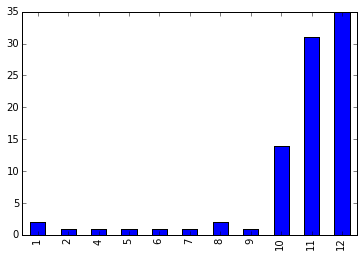

In [19]:
r = release
r = r[r.title.str.contains('Christmas')]
r = r[r.country == 'USA']
r.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

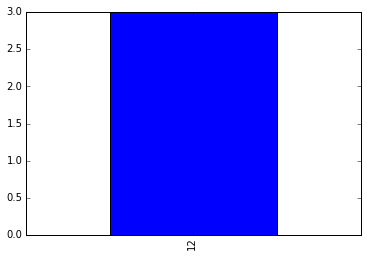

In [20]:
r = release
r = r[r.title.str.startswith('The Hobbit')]
r = r[r.country == 'USA']
r.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

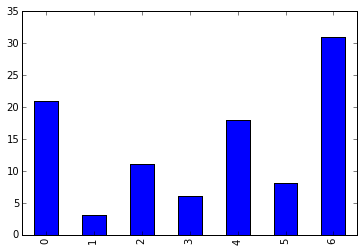

In [21]:
r = release
r = r[r.title.str.contains('Romance')]
r = r[r.country == 'USA']
r.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

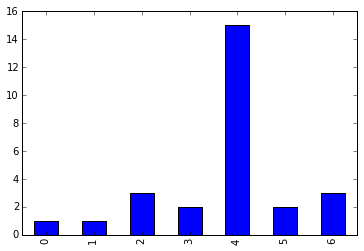

In [22]:
r = release
r = r[r.title.str.contains('Action')]
r = r[r.country == 'USA']
r.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [27]:
c = cast
c = c[(c.name == 'Judi Dench') & (c.year // 10 * 10 == 1990)]
c

,title,year,name,type,character,n
2518852,GoldenEye,1995,Judi Dench,actress,M,6
2518853,Hamlet,1996,Judi Dench,actress,Hecuba,12
2518859,Jack & Sarah,1995,Judi Dench,actress,Margaret,3
2518864,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1
2518876,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12
2518879,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2
2518887,The World Is Not Enough,1999,Judi Dench,actress,M,6
2518888,Tomorrow Never Dies,1997,Judi Dench,actress,M,9


In [33]:
r = release
r = r[r.country == 'USA']
d = r.merge(c, on=['title', 'year']).sort('date')
d

,title,year,country,date,name,type,character,n
0,GoldenEye,1995,USA,1995-11-17,Judi Dench,actress,M,6
2,Jack & Sarah,1995,USA,1996-03-22,Judi Dench,actress,Margaret,3
1,Hamlet,1996,USA,1996-12-25,Judi Dench,actress,Hecuba,12
3,Mrs Brown,1997,USA,1997-07-18,Judi Dench,actress,Queen Victoria,1
7,Tomorrow Never Dies,1997,USA,1997-12-19,Judi Dench,actress,M,9
4,Shakespeare in Love,1998,USA,1999-01-08,Judi Dench,actress,Queen Elizabeth,12
5,Tea with Mussolini,1999,USA,1999-05-14,Judi Dench,actress,Arabella,2
6,The World Is Not Enough,1999,USA,1999-11-19,Judi Dench,actress,M,6


### In which months do films with Judi Dench tend to be released in the USA?

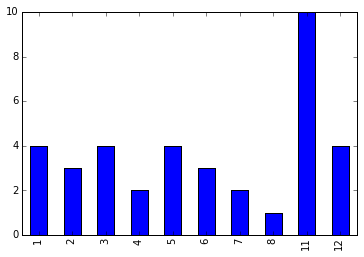

In [41]:
c = cast
c = c[c.name == 'Judi Dench'].sort('year')
r = release
r = r[r.country == 'USA']
d = r.merge(c, on=['title', 'year']).sort('date')
d.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

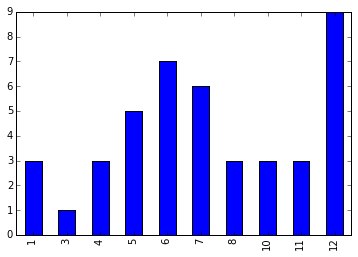

In [42]:
c = cast
c = c[c.name == 'Tom Cruise'].sort('year')
r = release
r = r[r.country == 'USA']
d = r.merge(c, on=['title', 'year']).sort('date')
d.date.dt.month.value_counts().sort_index().plot(kind='bar')